In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox, het_arch

from arch import arch_model

In [3]:
%matplotlib inline

In [4]:
rcParams['figure.figsize'] = [12, 8]

In [5]:
da = pd.read_csv('data/Chapter 3/m-intc7308.txt', sep='\s+')

In [6]:
intc = np.log(da['rtn'] + 1)

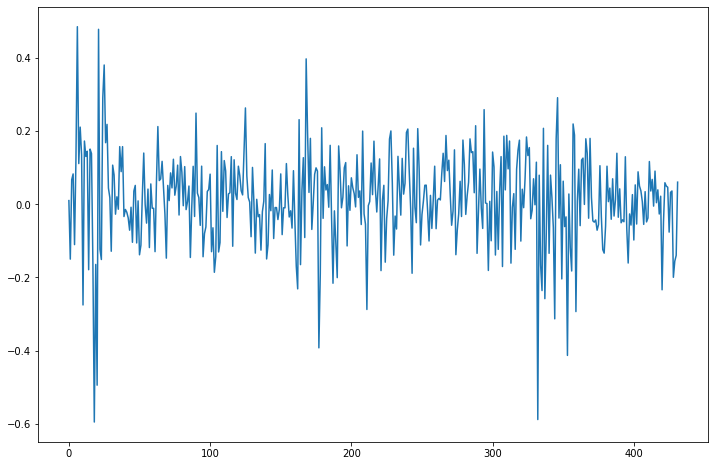

In [7]:
plt.plot(intc)

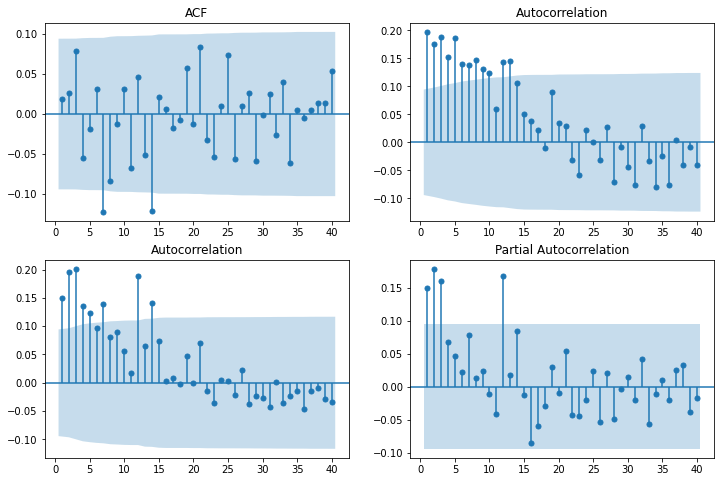

In [8]:
fig = plt.figure()
ax1 = fig.add_subplot(221)
fig = plot_acf(intc, ax=ax1, lags=40, title='ACF', zero=False)

ax2 = fig.add_subplot(223)
fig = plot_acf(np.power(intc, 2), ax=ax2, lags=40, zero=False)

ax3 = fig.add_subplot(222)
fig = plot_acf(np.abs(intc), ax=ax3, lags=40, zero=False)

ax4 = fig.add_subplot(224)
fig = plot_pacf(np.power(intc, 2), ax=ax4, lags=40, zero=False)

In [9]:
acorr_ljungbox(intc, lags=12)

d:\soft\python\python37\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


(array([ 0.14899644,  0.44211648,  3.15013763,  4.48091098,  4.64071967,
         5.06783829, 11.65031444, 14.79446048, 14.8600812 , 15.29725088,
        17.30162525, 18.26346254]),
 array([0.69949624, 0.80166999, 0.36905114, 0.34481695, 0.46127915,
        0.5351423 , 0.1126609 , 0.06326744, 0.09485171, 0.12159458,
        0.09926479, 0.10792192]))

In [10]:
het_arch(intc, maxlag=12)

d:\soft\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: the 'maxlag'' keyword is deprecated, use 'nlags' instead
  """Entry point for launching an IPython kernel.


(53.61972880410848,
 3.194833946427662e-07,
 4.963701955539153,
 1.0735874852455839e-07)

### Page 100

In [11]:
da = np.loadtxt('data/Chapter 3/exch-perc.txt')

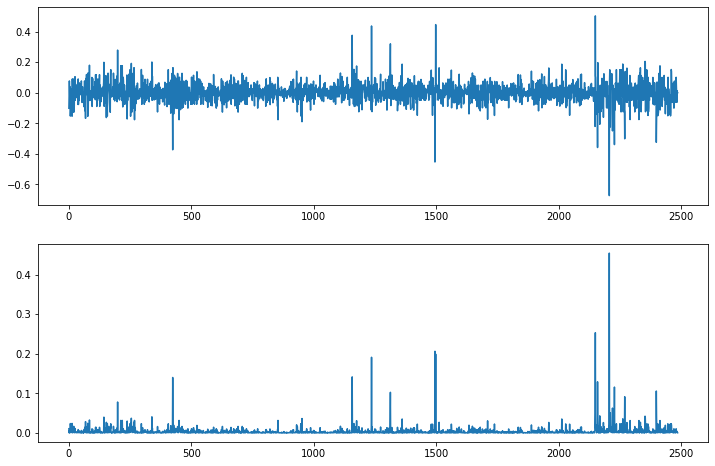

In [12]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.plot(da)

ax2 = fig.add_subplot(212)
ax2.plot(np.power(da, 2))

### 101

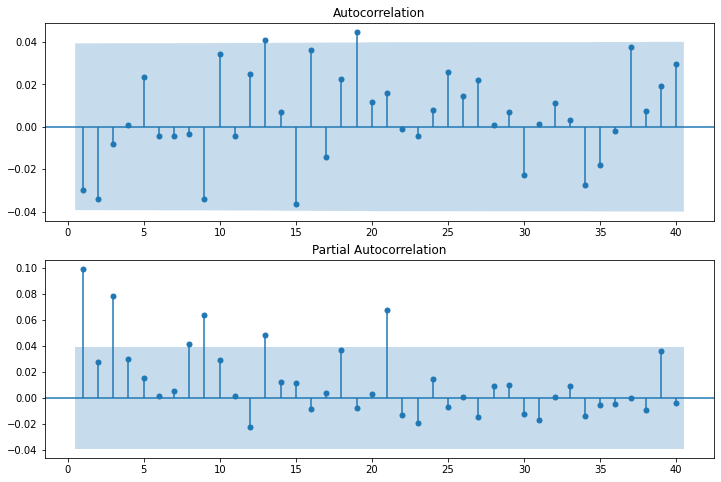

In [13]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
fig = plot_acf(da, ax=ax1, lags=40, zero=False)

ax2 = fig.add_subplot(212)
fig = plot_pacf(np.power(da, 2), ax=ax2, lags=40, zero=False)

In [14]:
am = arch_model(intc, p=1, o=0, q=1)

In [15]:
arch_model?

In [16]:
res = am.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 9682468856.493856
Iteration:      2,   Func. Count:     16,   Neg. LLF: 260501.25352961334
Iteration:      3,   Func. Count:     24,   Neg. LLF: 98481.33188833103
Iteration:      4,   Func. Count:     30,   Neg. LLF: -290.85689289992905
Iteration:      5,   Func. Count:     36,   Neg. LLF: -102.31300498896995
Iteration:      6,   Func. Count:     42,   Neg. LLF: 70180367.42307419
Iteration:      7,   Func. Count:     48,   Neg. LLF: -287.9824397096711
Iteration:      8,   Func. Count:     54,   Neg. LLF: -300.2350079678861
Iteration:      9,   Func. Count:     60,   Neg. LLF: -302.4401707717705
Iteration:     10,   Func. Count:     65,   Neg. LLF: -302.4472087785463
Iteration:     11,   Func. Count:     70,   Neg. LLF: -302.4473291637735
Iteration:     12,   Func. Count:     75,   Neg. LLF: -302.4473404487252
Iteration:     13,   Func. Count:     79,   Neg. LLF: -302.4473404470691
Optimization terminated successfully    (Exit mode 0

d:\soft\python\python37\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01635. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


In [17]:
res.summary

<bound method ARCHModelResult.summary of                      Constant Mean - GARCH Model Results                      
Dep. Variable:                    rtn   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                302.447
Distribution:                  Normal   AIC:                          -596.895
Method:            Maximum Likelihood   BIC:                          -580.621
                                        No. Observations:                  432
Date:                Mon, Nov 01 2021   Df Residuals:                      431
Time:                        14:49:19   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu            

In [18]:
#res.resid.shape
# het_arch(res.resid, maxlag=10)

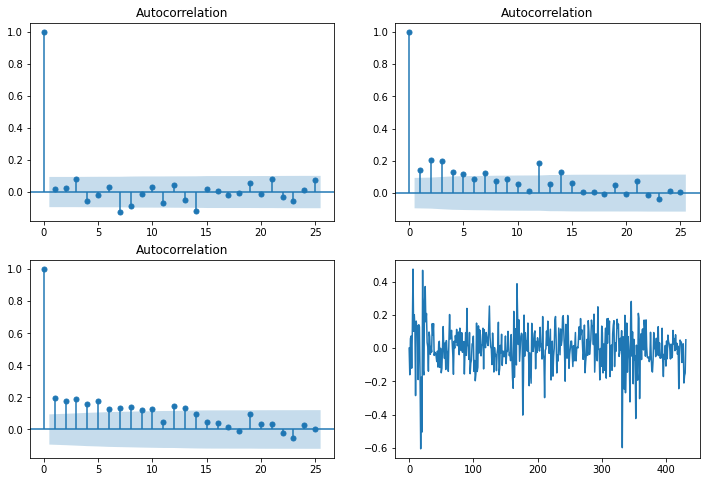

In [19]:
fig = plt.figure()
ax1 = fig.add_subplot(221)
fig = plot_acf(res.resid, ax=ax1, lags=25)

ax2 = fig.add_subplot(222)
fig = plot_acf(np.square(res.resid), ax=ax2, lags=25)

ax3 = fig.add_subplot(223)
fig = plot_acf(np.abs(res.resid), ax=ax3, lags=25)

ax4 = fig.add_subplot(224)
ax4.plot(res.resid)

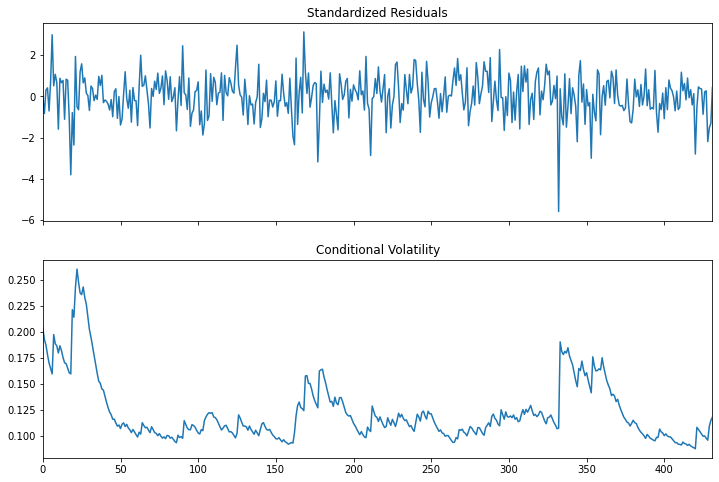

In [20]:
fig = res.plot()

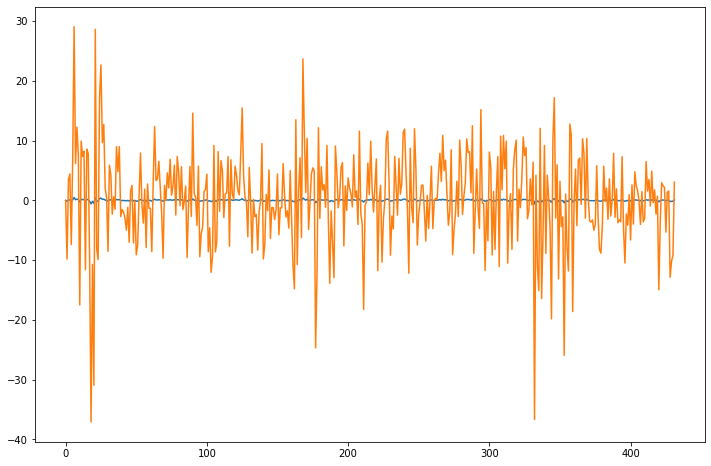

In [21]:
plt.plot(res.resid)
plt.plot(res.resid / np.var(res.resid))
plt.show()

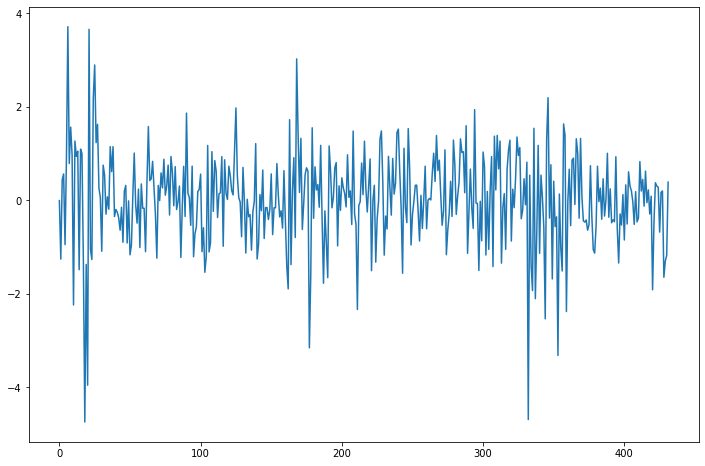

In [22]:
plt.plot(res.resid / np.sqrt(np.var(res.resid)))

###

In [23]:
sp500 = np.loadtxt('data/Chapter 3/sp500.dat')

In [24]:
am_sp500 = arch_model(sp500)

In [25]:
res_sp500 = am.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 9682468856.493856
Iteration:      2,   Func. Count:     16,   Neg. LLF: 260501.25352961334
Iteration:      3,   Func. Count:     24,   Neg. LLF: 98481.33188833103
Iteration:      4,   Func. Count:     30,   Neg. LLF: -290.85689289992905
Iteration:      5,   Func. Count:     36,   Neg. LLF: -102.31300498896995
Iteration:      6,   Func. Count:     42,   Neg. LLF: 70180367.42307419
Iteration:      7,   Func. Count:     48,   Neg. LLF: -287.9824397096711
Iteration:      8,   Func. Count:     54,   Neg. LLF: -300.2350079678861
Iteration:      9,   Func. Count:     60,   Neg. LLF: -302.4401707717705
Iteration:     10,   Func. Count:     65,   Neg. LLF: -302.4472087785463
Iteration:     11,   Func. Count:     70,   Neg. LLF: -302.4473291637735
Iteration:     12,   Func. Count:     75,   Neg. LLF: -302.4473404487252
Iteration:     13,   Func. Count:     79,   Neg. LLF: -302.4473404470691
Optimization terminated successfully    (Exit mode 0

d:\soft\python\python37\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01635. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


In [26]:
res_sp500.summary

<bound method ARCHModelResult.summary of                      Constant Mean - GARCH Model Results                      
Dep. Variable:                    rtn   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                302.447
Distribution:                  Normal   AIC:                          -596.895
Method:            Maximum Likelihood   BIC:                          -580.621
                                        No. Observations:                  432
Date:                Mon, Nov 01 2021   Df Residuals:                      431
Time:                        14:49:36   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu            